In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO
from aquaponics.gekko_extensions import register_extensions

In [2]:
m = register_extensions(GEKKO())

tf = 1
steps = tf * 100 + 1
m.time = np.linspace(0,tf,steps)

x = m.Var(value=1)
y = m.Var(value=0.2)
z = m.Var(value=0.2)
k = 100

m.Equation(x.dt() == -x)
m.Equation(y.dt() == x)
m.Equation(z == m.min(x, y))

m.options.IMODE = 4
m.solve(disp=False)

Text(0.5,0,'Time')

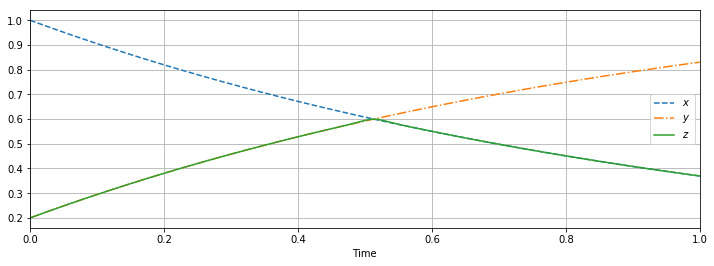

In [3]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.plot(m.time, x, label='$x$', linestyle='--')
plt.plot(m.time, y, label='$y$', linestyle='-.')
plt.plot(m.time, z, label='$z$')

plt.legend()
plt.grid()
plt.legend()

plt.xlim(0, tf)
plt.xlabel('Time')